# Advanced string search

files needed = ('callcenterdatacurrent.csv')

We have seen some basic methods for searching text using `str.contain()` or `str.find()` and passing strings to match. That works great when we know what we are searching for and the text we are searching has some order to it.  In this notebook, we introduce *regular expressions.* [Regular expressions](https://en.wikipedia.org/wiki/Regular_expression) (regex) use a special syntax that allows for powerful searching. For example, a regular expression could find the first four instances of numbers within a string (regardless of their values) or search for two capitalized letters followed by a comma. 

Regular expressions are not unique to pandas or python. They were developed as part of the theoretical basis for computing languages and are quite interesting in their own right. They can also be a bit confusing. 

Our goal is to learn a few regular expressions that might be helpful in the context of processing text data for analysis. We will only scratch the surface here. If you are interested in learning more, the internet is full of great tutorials.  [regex101.com](https://regex101.com/) is a fantastic sandbox for practicing.  

## Milwaukee call center data

The City of Milwaukee [open data portal](https://data.milwaukee.gov/) includes data sets on many aspects of the city. Today we will work with some of the [call center data](https://data.milwaukee.gov/dataset/callcenterdatacurrent). These data are incidents handled by the city's call center and cover things like missed garbage pick up, litter complaints, and burned out street lights. 

We will extract the calls regarding fire damage and compute some statistics about the cost of fires in the city. The estimates of fire damage are embedded in the text description and will need to be extracted. 

I've posted the data that I downloaded from the portal so that we are all working from the same dataset but you could download the freshest data, too. Your results would then be a bit different than mine.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pandas had some trouble with the last column, so I am specifying 
# that is should be treated as text.
calls = pd.read_csv('callcenterdatacurrent.csv', dtype={4:'str'}, parse_dates=[0, 3])

In [3]:
calls.sample(5)

CREATIONDATE                                         OBJECTDESC  \
128627 2020-01-16 21:28:13                                 2962 N MARYLAND AV   
53968  2020-06-29 00:00:00  2449 N MARTIN L KING JR DR, MILWAUKEE, WISCONS...   
8200   2020-09-25 00:00:00                                                NaN   
30873  2020-08-17 00:00:00   2823 N 20TH ST, MILWAUKEE, WISCONSIN, 53206-1605   
84486  2020-04-28 11:23:30                                      927 N 27TH ST   

                                    TITLE      CLOSEDDATETIME  \
128627   Street/Alley Lighting Outage Web 2020-01-18 11:07:39   
53968        Missed Collection: Recycling                 NaT   
8200    Miscellaneous Information Request 2020-09-25 00:00:00   
30873   Sanitation Inspector Notification                 NaT   
84486              Debris/Litter/Mess Web 2020-05-08 21:58:46   

                             CASECLOSUREREASONDESCRIPTION  
128627  Record number 3393912 is a request for Electri...  
53968   The church has not been gathering since March,...  
8200                                       STATUS REQUEST  
30873   Requesting alley inspection stating there is d...  
84486                                              Closed

Those column names could use some work. 

In [4]:
calls.columns = ['created', 'address', 'title', 'closed', 'desc']

What time span does the data cover? Since we made the 'created' and 'closed' columns datetime, we can use `.min()` and `.max()` to find out.

In [5]:
print('first call: {}'.format(calls['created'].min()))
print('last call: {}'.format(calls['created'].max()))

first call: 2020-01-01 01:22:53
last call: 2020-10-13 00:00:00


The fire damage calls have the title 'Fire Damage.'

In [6]:
fire = calls[calls['title']=='Fire Damage'].copy()

In [7]:
fire.shape

(116, 5)

In [8]:
fire.head(20)

created                                            address  \
71    2020-10-13  10536 W GLENBROOK CT, MILWAUKEE, WISCONSIN, 53...   
251   2020-10-13  4702 W TRIPOLI AV, MILWAUKEE, WISCONSIN, 53220...   
539   2020-10-12   2423 N 20TH ST, MILWAUKEE, WISCONSIN, 53206-1552   
631   2020-10-12  2921 W WALNUT ST, MILWAUKEE, WISCONSIN, 53208-...   
758   2020-10-12  3539 N VEL R PHILLIPS AV, MILWAUKEE, WISCONSIN...   
2684  2020-10-07  2455 N FRATNEY ST, MILWAUKEE, WISCONSIN, 53212...   
2685  2020-10-07  2455 N FRATNEY ST, MILWAUKEE, WISCONSIN, 53212...   
2866  2020-10-07   3766 N 86TH ST, MILWAUKEE, WISCONSIN, 53222-2830   
4437  2020-10-05  7233 N 38TH ST, 1, MILWAUKEE, WISCONSIN, 53209...   
4885  2020-10-02   2438 N 36TH ST, MILWAUKEE, WISCONSIN, 53210-3039   
4999  2020-10-02   3220 N 91ST ST, MILWAUKEE, WISCONSIN, 53222-3620   
5186  2020-10-02  6344 N 101ST ST, MILWAUKEE, WISCONSIN, 53225-0000   
5502  2020-10-01   2423 N 20TH ST, MILWAUKEE, WISCONSIN, 53206-1552   
8315  2020-09-25   2214 W NEIL PL, MILWAUKEE, WISCONSIN, 53209-5055   
8428  2020-09-25   2948 N 24TH ST, MILWAUKEE, WISCONSIN, 53206-1111   
8455  2020-09-25    3063 S 7TH ST, MILWAUKEE, WISCONSIN, 53215-3931   
9280  2020-09-24   4035 N 45TH ST, MILWAUKEE, WISCONSIN, 53216-1518   
9656  2020-09-23  1407 N MARTIN L KING JR DR, MILWAUKEE, WISCONS...   
9694  2020-09-23  1924 W GALENA ST, MILWAUKEE, WISCONSIN, 53205-...   
10155 2020-09-23   5137 N 22ND ST, MILWAUKEE, WISCONSIN, 53209-5604   

             title     closed  \
71     Fire Damage        NaT   
251    Fire Damage        NaT   
539    Fire Damage        NaT   
631    Fire Damage        NaT   
758    Fire Damage        NaT   
2684   Fire Damage 2020-10-07   
2685   Fire Damage 2020-10-07   
2866   Fire Damage 2020-10-08   
4437   Fire Damage 2020-10-05   
4885   Fire Damage 2020-10-08   
4999   Fire Damage 2020-10-02   
5186   Fire Damage 2020-10-07   
5502   Fire Damage 2020-10-05   
8315   Fire Damage 2020-09-28   
8428   Fire Damage 2020-10-02   
8455   Fire Damage 2020-09-25   
9280   Fire Damage 2020-10-02   
9656   Fire Damage 2020-09-23   
9694   Fire Damage 2020-09-30   
10155  Fire Damage 2020-09-23   

                                                    desc  
71     bldg loss $14,540.00\ncont loss $29,990.00\nca...  
251    bldg. loss $193,449.94\ncont loss $107,886.20\...  
539    bldg. loss $3,720.87\ncont loss $1383.41\ncaus...  
631    bldg loss $79,453.71\ncont loss $9,846.89\ncau...  
758    bldg loss $2,586.00\ncont loss $4,808.00\ncaus...  
2684     bldg. loss $6,503.00\ncause-under investigation  
2685          fire debris on property, needs cleaning up  
2866       bldg loss $5,48.26\ncause-under investigation  
4437   bldg. loss $139,411.00\ncont loss $9,758.00\nc...  
4885   bldg loss $61,675.00\ncont loss $22,932.00\nca...  
4999   bldg. loss $12,753.00\ncont loss $948.00\ncaus...  
5186                          Fire happened on July 10th  
5502   bldg. loss $3,720.00\ncont loss $1,383.00\ncau...  
8315   bldg loss $115,492.00\ncont loss $28,626.00\nc...  
8428   bldg. loss $46,659.00\ncont loss $21,973.00\nc...  
8455   bldg loss $5,000.00\ncont loss $5,000.00\ncaus...  
9280   bldg. loss $65,855.93\ncont loss $79,576.40\nc...  
9656   bldg. loss $5,000.00\ncont loss $2,500.00\ncau...  
9694   bldg loss $100,000.00\ncont loss $25,000.00\nc...  
10155  fire alarm report from 09/21/2020, finally got...

We can now see that there are two damage estimates reports. The first is the damage to the building. The second is the damage to the contents of the building. Some things that might cause difficulties:

1. 'bldg' but also 'bldg.'
2. There are not always 'cont loss' entries.
3. There may be spelling mistakes
4. There maybe inconsistent use of dollar signs or commas

Ugh. There is a reason why people who can do this stuff are paid well. 

## Regular expressions. 

What follows is a simple overview of regex and some examples to help us understand how they work. You should read through the `re` package documentation [HOWTO](https://docs.python.org/3/howto/regex.html#regex-howto) (up to "The Backslash Plague") before proceeding. 

We split the set of characters into two parts: metacharacters and everything else. Metacharacters have special meanings. The metacharacters are 
```
. ^ $ *  + ? { } [ ] \ | ( )
```

We will only cover a few of the metacharacters in this notebook. 

If we were working in python (and not pandas) we would use the [re](https://docs.python.org/3/library/re.html) package. We will use pandas methods such as `.findall()` and `.extract()` with regular expressions&mdash;pandas already knows how to interpret regular expressions. Many of the string methods in pandas accept either a string or a regex. 


Let's take a look at the first text element.

In [9]:
# Compare this to the jupyter nb output table above. The nb had problems with formatting. 

fire.loc[71, 'desc']

'bldg loss $14,540.00\ncont loss $29,990.00\ncause-under investigation\nremarks-small interior fire'

### Passing regex to pandas

We use the *raw string notation* which means we do not need to worry about things like \ being interpreted as a special character. Raw strings take the form r'some text', so the only difference between writing a raw string and a regular string is the 'r' in front. 

We put our expression(s) in parentheses. 

For example, if I want to find the word 'loss' I write 

```
r'(loss)'
```

The `r` and apostrophes are for the raw string, the `()` encapsulate the regex, and the regex itself is `loss`. 

### Matching characters

Extract  occurrences of 'loss'. 

`.findall()` will do this for the entire column. I am just going to print out a few.

In [10]:
fire['desc'].str.findall(r'(loss)').head(7)

71      [loss, loss]
251     [loss, loss]
539     [loss, loss]
631     [loss, loss]
758     [loss, loss]
2684          [loss]
2685              []
Name: desc, dtype: object

We are given a Series with the extracted text in a list. This is a Series where each element of a column is a list. Returning a list makes is easy to have rows with different numbers of occurrences.  

What happens if the extract fails?

In [11]:
fire['desc'].str.findall(r'(Bucky)').head(1)

71    []
Name: desc, dtype: object

### Character classes

We use `[]` to specify a set or class of characters to match. Suppose I wanted a `a, b,` or `c`.

In [12]:
# 'bldg loss $14,540.00\ncont loss $29,990.00\ncause-under investigation\nremarks-small interior fire'

fire['desc'].str.findall(r'([abc])').head(1)

71    [b, c, c, a, a, a, a]
Name: desc, dtype: object

We can also specify ranges of letter or numbers.

In [13]:
fire['desc'].str.findall(r'([a-c])').head(1)

71    [b, c, c, a, a, a, a]
Name: desc, dtype: object

There are some special pre-defined sequences that are used often.

* `\w` any alphanumeric character: equivalent to `[a-zA-Z0-9_]`
* `\d` any numeric digit: equivalent to `[0-9_]`

the complements are 
* `\W` anything but alphanumeric character: equivalent to `[^a-zA-Z0-9_]`
* `\D` anything but numeric digits: equivalent to `[^0-9_]`

The `^` character is the complement operator. 

In [14]:
# 'bldg loss $14,540.00\ncont loss $29,990.00\ncause-under investigation\nremarks-small interior fire'

fire['desc'].str.findall(r'(\w)').head(1)

71    [b, l, d, g, l, o, s, s, 1, 4, 5, 4, 0, 0, 0, ...
Name: desc, dtype: object

In [15]:
fire['desc'].str.findall(r'(\d)').head(1)

71    [1, 4, 5, 4, 0, 0, 0, 2, 9, 9, 9, 0, 0, 0]
Name: desc, dtype: object

### Repeating characters

* The `*` means look for the preceding character(s) **zero** or more times  
* The `+` means look for the preceding character(s) **one** or more times

The `*` means that those characters may show up many times or not at all. The `+` means that the characters have to show up at least once. 

In [16]:
# 'bldg loss $14,540.00\ncont loss $29,990.00\ncause-under investigation\nremarks-small interior fire'

print(fire['desc'].str.findall(r'(\d*)').head(1))
print(fire['desc'].str.findall(r'(\d+)').head(1))

71    [, , , , , , , , , , , 14, , 540, , 00, , , , ...
Name: desc, dtype: object
71    [14, 540, 00, 29, 990, 00]
Name: desc, dtype: object


Notice the difference between `*` and `+`. 

* The `*` expression returns many blank "hits." These are the characters leading up to the first `1`. Each one of those characters is not a number, but that is still considered a "hit" because zero decimal characters is considered a match. 

* The `+` expression returns only the clumps of numbers, since characters with zero numbers are excluded. Each clump stops when it hits a nonnumeral: the `,`, the `.`, and the `\`.

## Fire damage

We have just scratched the surface of regex and you might still feel a bit uncertain about how they work. That's okay&mdash;so does everyone else. Try searching for 'regex' on stackexchange and see how many questions pop up. I find sites like [https://regex101.com/](https://regex101.com/) very useful. You can enter a regex and a test string and it will help you see all the matches. 

Let's use regex to extract the damages from our data. 

In [17]:
fire['desc'].str.findall(r'(\d+,\d+.\d+)').head(5)

71       [14,540.00, 29,990.00]
251    [193,449.94, 107,886.20]
539                  [3,720.87]
631       [79,453.71, 9,846.89]
758        [2,586.00, 4,808.00]
Name: desc, dtype: object

In [18]:
fire.loc[71,'desc']

'bldg loss $14,540.00\ncont loss $29,990.00\ncause-under investigation\nremarks-small interior fire'

In [19]:
fire.loc[539,'desc']

'bldg. loss $3,720.87\ncont loss $1383.41\ncause-under investigation'

I'm looking for substrings of the form `y,xxx.zz` BUT, 

* the `y` variable may have 1, 2, or 3 digits or not none at all
* the `x` variable may have 1, 2, or 3 digits

My regex is 

```python
'\d+,\d+.\d+'
```

This is looking for at least one number and then all other numbers up to the `,` then more numbers up to the `.` and then the rest of the numbers. The `+` ensures that I am only getting numbers but is general enough to capture both `14` and `193`. 

Note that this approach could be troublesome if there are other numbers in the text, such as a phone number. We need to always check our results to see if we need to further clean the data. [Each dataset is unhappy in its own way.](https://www.goodreads.com/quotes/7142-all-happy-families-are-alike-each-unhappy-family-is-unhappy) 

Did we get everything? Nope. Look at index 539. There is only one entry. The contents loss entry does not have a comma in it so it is not being found. Let's fix this. 

### Optional characters

We use the `?` character to say that the preceding character or class is optional. Let's make the comma optional. 

In [20]:
fire['desc'].str.findall(r'(\d+,?\d+.\d+)').head(8)

71        [14,540.00, 29,990.00]
251     [193,449.94, 107,886.20]
539          [3,720.87, 1383.41]
631        [79,453.71, 9,846.89]
758         [2,586.00, 4,808.00]
2684                  [6,503.00]
2685                          []
2866                   [5,48.26]
Name: desc, dtype: object

We now have caught the contents damage for index 539. 

In [21]:
fire.loc[2684,'desc']

'bldg. loss $6,503.00\ncause-under investigation'

## Practice 

A problem remains: In index 2684, for example, we have only one entry. Here is the entry: 

```python
'bldg. loss $6,503.00\ncause-under investigation'
```

There is no 'contents damage' reported. How would we know from looking at our results that the 6,503.00 is the building damage entry? Perhaps there was not a building damage entry but only a contents damage entry?

1. Modify the `findall()` regex statement we have been using to return the text immediately before the number. This way, we will know which kind of damage is being reported. The output for 2684 would be:

```python 
'bldg. loss $6,503.00'
```

This way, we know that we are finding the building damage report.

Try something like: 

```python
.str.findall(r'(bldg. loss \$?\d+,?\d+.\d+)')
```


How many rows return an empty list?

In [22]:
bld = fire['desc'].str.findall(r'(bldg. loss \$?\d+,?\d+.\d+)')
bld.head(8)

71                            []
251     [bldg. loss $193,449.94]
539       [bldg. loss $3,720.87]
631                           []
758                           []
2684      [bldg. loss $6,503.00]
2685                          []
2866                          []
Name: desc, dtype: object

In [23]:
# This is how I checked the observations in which my regex found nothing.

fire[bld.map(len)==0]['desc'].shape

(58,)

2. Some of the row returning no values are errors. The problem is that some do not have `bldg.`, but have `bldg`.

Use the `?` to make the `.` optional and rerun your search. 

I found 17 observations that do not have building damage reported. 

In [24]:
bld = fire['desc'].str.findall(r'(bldg.? loss \$?\d+,?\d+.\d+)')
fire[bld.map(len)==0]['desc'].shape

(17,)

3. Use a statement similar to that in part 2 to extract strings of the form

```python 
'cont loss $29,990.00'
```

You probably need to deal with inconsistent punctuation and notation. Try manually checking the entries that do not return a value. I found 27 observations that do not have contents damage reported. 

In [25]:
# My debugging steps
# Start with the same regex I used in 1, but change bldg to cont
# cnt = fire['desc'].str.findall(r'(cont.? loss \$?\d+,?\d+.\d+)')

# loss is misspelled in 46401. So take any letters that follow 'cont. l'. Use \w+
#cnt = fire['desc'].str.findall(r'(cont.? l\w+ \$?\d+,?\d+.\d+)')

# No space before $ in 51321. Use ? to make it optional.
cnt = fire['desc'].str.findall(r'(cont.? l\w+ ?\$?\d+,?\d+.\d+)')

cnt.head()

71      [cont loss $29,990.00]
251    [cont loss $107,886.20]
539       [cont loss $1383.41]
631      [cont loss $9,846.89]
758      [cont loss $4,808.00]
Name: desc, dtype: object

In [26]:
fire[cnt.map(len)==0]['desc']

2684       bldg. loss $6,503.00\ncause-under investigation
2685            fire debris on property, needs cleaning up
2866         bldg loss $5,48.26\ncause-under investigation
5186                            Fire happened on July 10th
11215    bldg. loss $75,000.00\ncause-intentional\nrema...
16264    fire damage just today, fire department was ou...
16996          raw sewage coming into basement of building
22711      bldg loss $53,569.00\ncause-under investigation
27090    bldg loss $5,120.65\ncause-under investigation...
28141    Fire damage to house, put in request for fire ...
29210    Attic Fire has taken place.  There is damage t...
31017    bldg. loss $21,478.00\ncause-incense ignited s...
34274      bldg loss $83,927.00\ncause-under investigation
36772    bldg loss $10,727.14\ncause-radiant heat from ...
37621                Unreported fire damage from 7/8/2020?
51056    Yesterday (07/04/2020), my grandmotherâ€™s nei...
53530                                         Fire damag

4. Now repeat steps 2 and 3 but save the output into new columns of the `fire` DataFrame. Name them bld_loss and cnt_loss. 

   Rather than use `.findall()`, use `.extract()`. `.extract()` will return the first occurrence of the regex. Since we only have at most one occurrence per observation, this is good. The benefit of `.extract()` over `.findall()` is that `.extract()` returns a string rather than a list.
   
  Something like: 
  
  ```python
fire['bld_loss'] = fire['desc'].str.extract(r'(bldg.? loss \$?\d+,?\d+.\d+)')
```

In [27]:
fire['bld_loss'] = fire['desc'].str.extract(r'(bldg.? loss \$?\d+,?\d+.\d+)')
fire['cnt_loss'] = fire['desc'].str.extract(r'(c\w+.? l\w+ ?\$?\d+,?\d+.\d+)')

fire.head()

created                                            address  \
71  2020-10-13  10536 W GLENBROOK CT, MILWAUKEE, WISCONSIN, 53...   
251 2020-10-13  4702 W TRIPOLI AV, MILWAUKEE, WISCONSIN, 53220...   
539 2020-10-12   2423 N 20TH ST, MILWAUKEE, WISCONSIN, 53206-1552   
631 2020-10-12  2921 W WALNUT ST, MILWAUKEE, WISCONSIN, 53208-...   
758 2020-10-12  3539 N VEL R PHILLIPS AV, MILWAUKEE, WISCONSIN...   

           title closed                                               desc  \
71   Fire Damage    NaT  bldg loss $14,540.00\ncont loss $29,990.00\nca...   
251  Fire Damage    NaT  bldg. loss $193,449.94\ncont loss $107,886.20\...   
539  Fire Damage    NaT  bldg. loss $3,720.87\ncont loss $1383.41\ncaus...   
631  Fire Damage    NaT  bldg loss $79,453.71\ncont loss $9,846.89\ncau...   
758  Fire Damage    NaT  bldg loss $2,586.00\ncont loss $4,808.00\ncaus...   

                   bld_loss               cnt_loss  
71     bldg loss $14,540.00   cont loss $29,990.00  
251  bldg. loss $193,449.94  cont loss $107,886.20  
539    bldg. loss $3,720.87     cont loss $1383.41  
631    bldg loss $79,453.71    cont loss $9,846.89  
758     bldg loss $2,586.00    cont loss $4,808.00

5. From 'bld_loss' and 'cnt_loss' extract only the numeric parts so that we have data we can work with. I used `.extract()` again with the appropriate regex. 

In [28]:
fire['bld_loss'] = fire['bld_loss'].str.extract(r'(\d+,?\d+.\d+)')
fire['cnt_loss'] = fire['cnt_loss'].str.extract(r'(\d+,?\d+.\d+)')

6. Convert your extracted values to numeric types. You will need to deal with the commas.

In [29]:
fire['bld_loss'] = fire['bld_loss'].str.replace(',', '').astype(float)
fire['cnt_loss'] = fire['cnt_loss'].str.replace(',', '').astype(float)

In [30]:
fire.dtypes

created     datetime64[ns]
address             object
title               object
closed      datetime64[ns]
desc                object
bld_loss           float64
cnt_loss           float64
dtype: object

7. Compute some summary statistics. What was the average damage to buildings and contents? What are the max and min? 

If you finish early: Create some histograms visualize the data. 

In [31]:
fire[['bld_loss', 'cnt_loss']].describe().applymap("{0:,.0f}".format)

bld_loss cnt_loss
count         99       89
mean     117,945   39,912
std      297,512   67,763
min          548       20
25%       15,004    8,687
50%       55,446   20,000
75%      113,648   38,482
max    2,633,953  531,035

In [32]:
# I am not including two very large fires in the histogram.

fire['bld_loss'].sort_values().dropna().tail(2)

62206    1307226.0
58606    2633953.0
Name: bld_loss, dtype: float64

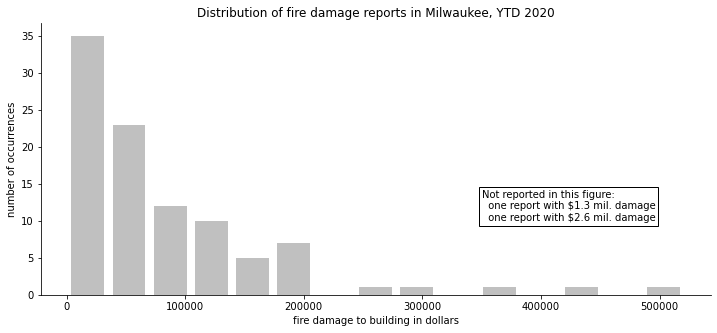

In [33]:
fig, ax = plt.subplots(figsize=(12,5))

ax.hist(fire.loc[fire['bld_loss']<=600000,'bld_loss'].dropna(), 
        color='silver', rwidth=0.8, 
        bins=15, align='mid')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('fire damage to building in dollars')
ax.set_ylabel('number of occurrences')
ax.set_title('Distribution of fire damage reports in Milwaukee, YTD 2020')

ax.text(350000, 10, 
        'Not reported in this figure:\n  one report with \$1.3 mil. damage\n  one report with \$2.6 mil. damage',
       bbox=dict(boxstyle='square', fc='white'))


plt.show()